In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 



In [19]:
movie_data=pd.read_csv('./data/movie_metadata.csv')
print(movie_data)

                 color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color      Gore Verbinski                   302.0     169.0   
2                Color          Sam Mendes                   602.0     148.0   
3                Color   Christopher Nolan                   813.0     164.0   
4                  NaN         Doug Walker                     NaN       NaN   
5                Color      Andrew Stanton                   462.0     132.0   
6                Color           Sam Raimi                   392.0     156.0   
7                Color        Nathan Greno                   324.0     100.0   
8                Color         Joss Whedon                   635.0     141.0   
9                Color         David Yates                   375.0     153.0   
10               Color         Zack Snyder                   673.0     183.0   
11               Color        Bryan Sing

In [17]:
movie_data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [20]:
title=movie_data.movie_title
print(title)

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
5                                            John Carter 
6                                           Spider-Man 3 
7                                                Tangled 
8                                Avengers: Age of Ultron 
9                 Harry Potter and the Half-Blood Prince 
10                    Batman v Superman: Dawn of Justice 
11                                      Superman Returns 
12                                     Quantum of Solace 
13            Pirates of the Caribbean: Dead Man's Chest 
14                                       The Lone Ranger 
15                                          Man of Steel 
16              The Chronicles of Narnia: Prince Caspian 
17            

# MOVIE RECCOMENDATION SYSTEM

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

In [2]:
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("D:/reccomendation system/ml-100k/u.data",sep='\t')


In [4]:
df.shape

(99999, 4)

In [5]:
df.columns=['user id' ,'item id' ,'rating', 'timestamp']
df.head()

,user id,item id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [6]:
movie_title=pd.read_csv("D:/reccomendation system/ml-100k/u.item",sep='|',header=None)
movie_title.head(5)
movie_title=movie_title[[0,1]]
movie_title.columns=['item id','title']
print(movie_title)

      item id                                              title
0           1                                   Toy Story (1995)
1           2                                   GoldenEye (1995)
2           3                                  Four Rooms (1995)
3           4                                  Get Shorty (1995)
4           5                                     Copycat (1995)
5           6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6           7                              Twelve Monkeys (1995)
7           8                                        Babe (1995)
8           9                            Dead Man Walking (1995)
9          10                                 Richard III (1995)
10         11                               Seven (Se7en) (1995)
11         12                         Usual Suspects, The (1995)
12         13                            Mighty Aphrodite (1995)
13         14                                 Postino, Il (1994)
14         15            

In [7]:
ds=pd.merge(df ,movie_title, on='item id')
ds.head()

,user id,item id,rating,timestamp,title
0,186,302,3,891717742,L.A. Confidential (1997)
1,191,302,4,891560253,L.A. Confidential (1997)
2,49,302,4,888065432,L.A. Confidential (1997)
3,54,302,4,880928519,L.A. Confidential (1997)
4,62,302,3,879371909,L.A. Confidential (1997)


In [8]:
ds['user id'].nunique()

943

In [9]:
ds['item id'].nunique()

1682

### this will result to the list of all the movies with their mean in each cloumn such as mean rating of each movie , mean item id of each movie ,etc

In [10]:
ds.groupby('title').mean().head()

,user id,item id,rating,timestamp
title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08


In [11]:
#but we need the mean value of only the rating column so  we will choose only the rating column and then group it 
ds.groupby('title').mean()['rating'].sort_values().head()

title
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Butterfly Kiss (1995)                           1.0
Daens (1992)                                    1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Name: rating, dtype: float64

### now there is a possibility that the movie average rating 5 is reviewed by one or two people because its quite uncommon for a movie to get 5 stars in mean , for this we need to count the ratings provided  

In [12]:
ds.groupby('title').count()['rating'].sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

###  to save this rating and their count we will create a new dataset and than save this  analysis in it 


In [13]:
Ratings=pd.DataFrame(ds.groupby('title').mean()['rating'])#will create the new datframe with the mean ratings

In [14]:
Ratings['no._of_ratings']=pd.DataFrame(ds.groupby('title').count()['rating'])#will add the column no of ratings
                                                                            #in the Ratings dataframe

In [15]:
Ratings.head()

,rating,no._of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


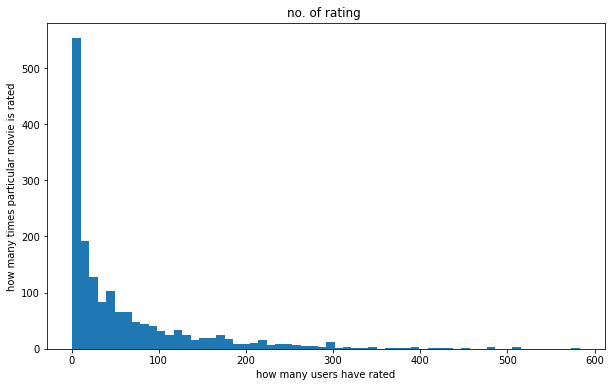

In [16]:
plt.figure(figsize=(10,6))
plt.hist(Ratings['no._of_ratings'],bins=60)
plt.title('no. of rating ')
plt.xlabel('how many users have rated')
plt.ylabel('how many times particular movie is rated')
plt.show()

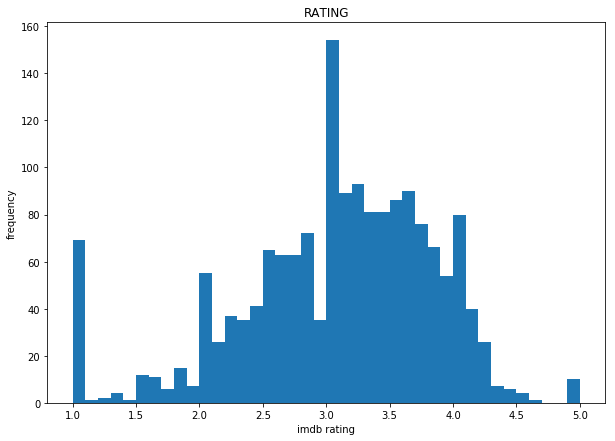

In [17]:
plt.figure(figsize=(10,7))
plt.hist(Ratings['rating'],bins=40)
plt.title('RATING')
plt.xlabel('imdb rating')
plt.ylabel('frequency')
plt.show()

###  from the graph we can say that it is a normal distribution graph with the mean of around 3 imdb rating 

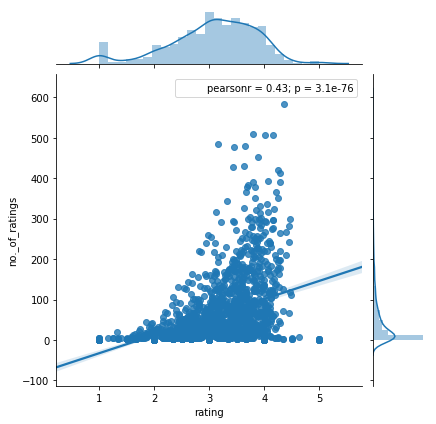

In [18]:
sns.jointplot(x='rating', y='no._of_ratings' ,data=Ratings,kind='reg')
plt.show()

#  recommendation system 

In [60]:
movie_matrix =ds.pivot_table(index='user id',columns='title',values='rating')
movie_matrix.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [61]:
star_wars_user_rating=movie_matrix['Star Wars (1977)']
star_wars_user_rating.head()

user id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [62]:
similiar_movie=movie_matrix.corrwith(star_wars_user_rating)#find the corrwith the desired movie
similiar_movie.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [63]:
#create a dataframe to save this correlation

In [65]:
corr_starwars=pd.DataFrame(similiar_movie,columns=['corr'])
corr_starwars

,corr
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


#### now we have to terminate the nan values present in the dataframe

In [66]:
corr_starwars.dropna(inplace=True)#with this all the nan values will be dropped from the dataframe
corr_starwars.sort_values('corr',ascending=False)

,corr
title,
Hollow Reed (1996),1.000000
Commandments (1997),1.000000
Cosi (1996),1.000000
No Escape (1994),1.000000
Stripes (1981),1.000000
Star Wars (1977),1.000000
Man of the Year (1995),1.000000
"Beans of Egypt, Maine, The (1994)",1.000000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000


#### `now we have to filter our data because the movie being suggested have the correlation but the total no. of users is quite less so we cant consider those as reccomendations so the threshold we get from the exploratory data analysis is atleast 100 user would have reviewed the movie 

In [70]:
corr_starwars=corr_starwars.join(Ratings['no._of_ratings'])
corr_starwars

,corr,no._of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [88]:
corr_starwars=corr_starwars[corr_starwars['no._of_ratings']>100]
corr_starwars.head

<bound method DataFrame.head of                                                         corr  no._of_ratings
title                                                                       
Star Wars (1977)                                    1.000000             583
Empire Strikes Back, The (1980)                     0.747981             367
Return of the Jedi (1983)                           0.672556             507
Raiders of the Lost Ark (1981)                      0.536117             420
Austin Powers: International Man of Mystery (1997)  0.377433             130
Sting, The (1973)                                   0.367538             241
Indiana Jones and the Last Crusade (1989)           0.350107             331
Pinocchio (1940)                                    0.347868             101
Frighteners, The (1996)                             0.332729             115
L.A. Confidential (1997)                            0.319065             297>

In [90]:
corr_starwars.sort_values('corr',ascending=False).head(10)

,corr,no._of_ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


## predict function


In [107]:
def Predict(movie_name):
    movie_user_rating=movie_matrix[movie_name]
    similiar_movie=movie_matrix.corrwith(movie_user_rating)
    
    corr_movie=pd.DataFrame(similiar_movie,columns=['corr'])
    corr_movie.dropna(inplace=True)
    
    corr_movie.sort_values('corr',ascending=False)
    corr_movie=corr_movie.join(Ratings['no._of_ratings'])
    prediction=corr_movie[corr_movie['no._of_ratings']>100]
    prediction=prediction.sort_values('corr',ascending=False).head(10)
   
    return prediction
    

In [108]:
prediction=Predict("Titanic (1997)")
print(prediction)

                                                   corr  no._of_ratings
title                                                                  
Titanic (1997)                                 1.000000             350
River Wild, The (1994)                         0.497600             146
Abyss, The (1989)                              0.472103             151
Bram Stoker's Dracula (1992)                   0.443560             120
True Lies (1994)                               0.435104             208
William Shakespeare's Romeo and Juliet (1996)  0.430243             106
Last of the Mohicans, The (1992)               0.427239             128
Outbreak (1995)                                0.426237             104
Die Hard (1988)                                0.403124             243
Frighteners, The (1996)                        0.398516             115
